## Welcome to Spark!

Spark is an extremely powerful cluster computing framework that is used for data workloads that require more resources than can be provided by a single node. There is a wealth of information available online about Spark, as it is one of the most in demand data engineering tools today. In general, Spark is the de facto tool of choice for working with large data sets, streaming data, or high concurrency workloads.

In this lab, you'll read in some datasets and do a few basic tasks. The beauty of Spark is that you can write it on a local machine, and then deploy it to a massive cluster and thus scale your workload seamlessly.

For now you'll use Databricks to run the lab. Databricks is a company that provides a managed Spark solution. Although you can run Spark anywhere, using Databricks will allow us to jump right into learning the program, without needing to spend any time configuring the environment.

You may notice that parts of Spark feels a bit like pandas or SQL. This is because much of Spark's feel has been inherited from those tools. In general Spark is just a little more verbose than pandas, but in return for that verbosity, you get incredible power.

If you'd like to read up in great depth, this [e-book](https://runawayhorse001.github.io/LearningApacheSpark/pyspark.pdf) is excellent.

We'll use a popular Kaggle dataset for this lab. Head over [here](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) to download the data, and then let's get started!

In [14]:
import sys
!{sys.executable} -m pip install pyspark



  Using cached pyspark-3.3.0.tar.gz (281.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached py4j-0.10.9.5-py2.py3-none-any.whl (199 kB)
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=22e18da5b8494013c012c1b616f22ee3df29955006e3c0a84ae247001f82733f
  Stored in directory: /Users/kendra/Library/Caches/pip/wheels/81/9c/6c/d5200fcf351ffa39cbe09911e99703283624cd037df58070d9
Successfully built pyspark
You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.4.3/libexec/bin/python3.10 -m pip install --upgrade pip' command.


In [15]:
from pyspark.sql import SparkSession
spark = (SparkSession
        .builder
        .appName("how to read csv file")
        .getOrCreate())

22/08/22 08:27:45 WARN Utils: Your hostname, Zipcoders-MacBook-Pro-45.local resolves to a loopback address: 127.0.0.1; using 192.168.3.113 instead (on interface en0)
22/08/22 08:27:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/22 08:27:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [19]:
#read in the data set

housing_data = spark.read.csv('/Users/kendra/dev/DataEngineering.Labs.Libraries/Spark - Part 1/AB_NYC_2019.csv',
                    inferSchema=True, header="true")

Datatypes can be a little tricky in Spark. Keep this in mind when operating on tables. Let's give the dtypes a quick check below.

In [20]:
housing_data.dtypes

[('id', 'string'),
 ('name', 'string'),
 ('host_id', 'string'),
 ('host_name', 'string'),
 ('neighbourhood_group', 'string'),
 ('neighbourhood', 'string'),
 ('latitude', 'string'),
 ('longitude', 'string'),
 ('room_type', 'string'),
 ('price', 'string'),
 ('minimum_nights', 'string'),
 ('number_of_reviews', 'string'),
 ('last_review', 'string'),
 ('reviews_per_month', 'string'),
 ('calculated_host_listings_count', 'string'),
 ('availability_365', 'int')]

You'll see above, just about everything was read in as a string. This is somewhat akin to things being read in as 'object' in pandas. For now, we'll leave this as is, but keep this in mind. Id you ever get results that don't make sense, do a quick check of the dtypes you're working with.

In [21]:
#show the first few rows

housing_data.show(5)

+----+--------------------+-------+-----------+-------------------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|  id|                name|host_id|  host_name|neighbourhood_group|neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|
+----+--------------------+-------+-----------+-------------------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|2539|Clean & quiet apt...|   2787|       John|           Brooklyn|   Kensington|40.64749|-73.97237|   Private room|  149|             1|                9| 2018-10-19|             0.21|                             6|             365|
|2595|Skylit Midtown Ca...|   2845|   Jennifer|          Manhatt

In [22]:
#check how many rows there are in this dataset

housing_data.count()

49079

In [23]:
#display summary stats for the data

housing_data.describe().show()

+-------+--------------------+-----------------------------+--------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------------------+------------------+
|summary|                  id|                         name|             host_id|           host_name|neighbourhood_group|     neighbourhood|          latitude|         longitude|         room_type|             price|    minimum_nights|number_of_reviews|      last_review| reviews_per_month|calculated_host_listings_count|  availability_365|
+-------+--------------------+-----------------------------+--------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+-------------------------

You may notice the default view for Spark dataframes is not as clean as pandas. For summary stats and other small dataframes, there's a nifty method you can use to display things in a cleaner way. .toPandas() will be your friend.

Careful though, only use this as neccesary when you need a cleaner display. It's best to not mix up Spark and pandas too much :)

In [24]:
#display summary stats using .toPandas()

housing_data.describe().toPandas()

,summary,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,count,49079,49047,48894,48873,48894,48894,48894,48894,48894,48894,48894,48874,38845,38864,48892,48737
1,mean,1.9017143236179568E7,1.02037532075E8,6.749591589946438E7,NaN,1.960586395E8,40.49195828025477,40.363025517234234,437.11073690003474,148.10106579268293,152.22296299343384,7.1286126280910596,23.25829574459354,2.629232137931034,1.3743823665654573,7.655045918471702,112.59808769518025
2,stddev,1.0983108385610051E7,8.709090084371349E7,7.855358174017511E7,NaN,1897565.595041315,3.0923424874796805,6.467103784584835,112820.3283663637,507.0239464524174,238.54148640283205,20.82853436534699,44.55795124559949,8.964786212322723,1.6943762173150199,34.82254748680066,131.60972881440708
3,min,"12 mins Manhattan""",1 Bed Apt in Utopic Williamsburg,"Heart of Greenwich Village""","very clean studio app""",194716858,2,-73.72247,-73.71299,-73.90783,-73.99986,0,0,-73.94134,0,0,0
4,max,"獨一無二的紐約閣樓""","ﾏﾝﾊｯﾀﾝ､駅から徒歩4分でどこに行くのにも便利な場所!女性の方希望,ｷﾚｲなお部屋｡",呈刚,현선,Woodside,Woodside,West Village,Shared room,Shared room,Private room,Private room,99,9.66,Private room,99,365


You can also call display() to format tables nicely

In [25]:
#use display() to show summary stats

display(housing_data.describe())

DataFrame[summary: string, id: string, name: string, host_id: string, host_name: string, neighbourhood_group: string, neighbourhood: string, latitude: string, longitude: string, room_type: string, price: string, minimum_nights: string, number_of_reviews: string, last_review: string, reviews_per_month: string, calculated_host_listings_count: string, availability_365: string]

In [26]:
#filter the df to find only listings in Brooklyn using Spark's .filter() method

housing_data.filter(housing_data['neighbourhood_group'] == 'Brooklyn').show(5)

+----+--------------------+-------+-------------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|  id|                name|host_id|    host_name|neighbourhood_group|     neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|
+----+--------------------+-------+-------------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|2539|Clean & quiet apt...|   2787|         John|           Brooklyn|        Kensington|40.64749|-73.97237|   Private room|  149|             1|                9| 2018-10-19|             0.21|                             6|             365|
|3831|Cozy Entire Floor...|   4869| 

Another really cool feature in Spark, is that you can query data as if it's a table in a SQL database. This makes finding/selecting super easy!

In [27]:
#create a temp view and return only apartments in Brooklyn using SQL

housing_data.createOrReplaceTempView('sql_view')

brooklyn = spark.sql("SELECT * FROM sql_view WHERE neighbourhood_group='Brooklyn'")
brooklyn.show(5)

+----+--------------------+-------+-------------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|  id|                name|host_id|    host_name|neighbourhood_group|     neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|
+----+--------------------+-------+-------------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|2539|Clean & quiet apt...|   2787|         John|           Brooklyn|        Kensington|40.64749|-73.97237|   Private room|  149|             1|                9| 2018-10-19|             0.21|                             6|             365|
|3831|Cozy Entire Floor...|   4869| 

If you've done the above correctly, both query methods will return the same data!

In [28]:
#select just the host name column

housing_data.select('host_name').show()

+----------------+
|       host_name|
+----------------+
|            John|
|        Jennifer|
|       Elisabeth|
|     LisaRoxanne|
|           Laura|
|           Chris|
|           Garon|
|        Shunichi|
|       MaryEllen|
|             Ben|
|            Lena|
|            Kate|
|          Laurie|
|         Claudio|
|           Alina|
|   Allen & Irina|
|            Jane|
|            Doti|
|Adam And Charity|
|            Sing|
+----------------+
only showing top 20 rows



In [29]:
#find the most common host names using .groupby(), and .count()

housing_data.groupby('host_name').count().orderBy('count', ascending=False).show()

+------------+-----+
|   host_name|count|
+------------+-----+
|     Michael|  416|
|       David|  402|
|Sonder (NYC)|  327|
|        John|  294|
|        Alex|  279|
|  Blueground|  232|
|       Sarah|  227|
|      Daniel|  226|
|        null|  206|
|     Jessica|  205|
|       Maria|  203|
|        Mike|  193|
|      Andrew|  190|
|        Anna|  187|
|       Chris|  182|
|       Laura|  182|
|     Melissa|  158|
|       Emily|  157|
|    Jennifer|  154|
|       James|  148|
+------------+-----+
only showing top 20 rows



In [30]:
#find the most common host names in Manhattan using SQL

manhattan = spark.sql("SELECT host_name, neighbourhood_group, COUNT(host_name) \
                     FROM sql_view \
                     WHERE neighbourhood_group = 'Manhattan' \
                     GROUP BY host_name, neighbourhood_group \
                     ORDER BY count(host_name) DESC \
                     LIMIT 10")
manhattan.show(10)

+------------+-------------------+----------------+
|   host_name|neighbourhood_group|count(host_name)|
+------------+-------------------+----------------+
|Sonder (NYC)|          Manhattan|             327|
|  Blueground|          Manhattan|             230|
|     Michael|          Manhattan|             211|
|       David|          Manhattan|             201|
|        John|          Manhattan|             151|
|        Kara|          Manhattan|             135|
|        Alex|          Manhattan|             134|
|        Mike|          Manhattan|             134|
|      Daniel|          Manhattan|             107|
|         Ken|          Manhattan|             100|
+------------+-------------------+----------------+



In [31]:
#find the most common host names in Queens

queens = spark.sql("SELECT host_name, neighbourhood_group, COUNT(host_name) \
                     FROM sql_view \
                     WHERE neighbourhood_group = 'Queens' \
                     GROUP BY host_name, neighbourhood_group \
                     ORDER BY count(host_name) DESC \
                     LIMIT 10")
queens.show(10)

+---------+-------------------+----------------+
|host_name|neighbourhood_group|count(host_name)|
+---------+-------------------+----------------+
|   Kazuya|             Queens|              79|
|    David|             Queens|              50|
|  Michael|             Queens|              37|
|    Maria|             Queens|              34|
|     John|             Queens|              33|
|   Hiroki|             Queens|              29|
|     Anna|             Queens|              27|
|     Mark|             Queens|              26|
|  Jessica|             Queens|              23|
|    Yuval|             Queens|              23|
+---------+-------------------+----------------+



In [32]:
#find average availability by borough (remember there are 5 boroughs in NYC)

averages = spark.sql("SELECT neighbourhood_group, AVG(availability_365) as average_availability \
                     FROM sql_view \
                     GROUP BY neighbourhood_group \
                     ORDER BY average_availability DESC")
averages.show(5)

+-------------------+--------------------+
|neighbourhood_group|average_availability|
+-------------------+--------------------+
|      Staten Island|  198.64864864864865|
|              Bronx|  165.41018518518518|
|             Queens|  144.21811722912966|
|          Manhattan|  111.85583958506993|
|           Brooklyn|  100.13323360757916|
+-------------------+--------------------+
only showing top 5 rows



Let's if there's a pattern between average availability across boroughs and average prices. You might think prices are highest where availability is lowest.

In [33]:
#find average availability and price by borough


averages_and_price = spark.sql("SELECT neighbourhood_group, AVG(price) as average_price, AVG(availability_365) as average_availability\
                     FROM sql_view \
                     GROUP BY neighbourhood_group \
                     ORDER BY average_price DESC")
averages_and_price.show(5)

+-------------------+------------------+--------------------+
|neighbourhood_group|     average_price|average_availability|
+-------------------+------------------+--------------------+
|          Manhattan|196.74321570806705|  111.85583958506993|
|           Brooklyn|124.39840438793318|  100.13323360757916|
|      Staten Island|114.99459459459459|  198.64864864864865|
|             Queens| 99.57690941385435|  144.21811722912966|
|              Bronx|  87.7287037037037|  165.41018518518518|
+-------------------+------------------+--------------------+
only showing top 5 rows



Seems the price/availability correlation isn't true in the averages, but let's take a closer look using a scatterplot. There is built in plotting functionality in Databricks, which you're free to use. That said you may find its easier to use matplotlib/seaborn/etc.

Two hints for the plotting below:
  -You'll need to make sure your columns are some sort of number dtype
  -Matplotlib/seaborn won't like the spark dataframes directly. You can use toPandas() to solve this problem

In [34]:
#check the dtypes

housing_data.dtypes

[('id', 'string'),
 ('name', 'string'),
 ('host_id', 'string'),
 ('host_name', 'string'),
 ('neighbourhood_group', 'string'),
 ('neighbourhood', 'string'),
 ('latitude', 'string'),
 ('longitude', 'string'),
 ('room_type', 'string'),
 ('price', 'string'),
 ('minimum_nights', 'string'),
 ('number_of_reviews', 'string'),
 ('last_review', 'string'),
 ('reviews_per_month', 'string'),
 ('calculated_host_listings_count', 'string'),
 ('availability_365', 'int')]

In [35]:
#change price to a "number like" dtype

housing_data = housing_data.withColumn("price", housing_data.price.cast("int"))

In [36]:
#check dtypes again to make sure 

housing_data.dtypes

[('id', 'string'),
 ('name', 'string'),
 ('host_id', 'string'),
 ('host_name', 'string'),
 ('neighbourhood_group', 'string'),
 ('neighbourhood', 'string'),
 ('latitude', 'string'),
 ('longitude', 'string'),
 ('room_type', 'string'),
 ('price', 'int'),
 ('minimum_nights', 'string'),
 ('number_of_reviews', 'string'),
 ('last_review', 'string'),
 ('reviews_per_month', 'string'),
 ('calculated_host_listings_count', 'string'),
 ('availability_365', 'int')]

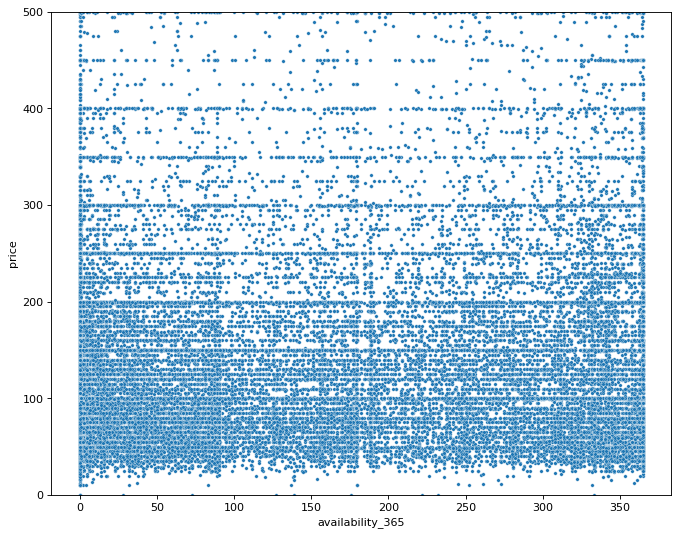

In [37]:
#scatterplot the relationship between price and availability

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8), dpi= 80)
sns.scatterplot(x=housing_data.toPandas().availability_365, y=housing_data.toPandas().price, s=10)
plt.ylim(0, 500)
plt.show()

So there you have it. We've read in some data, done some basic selecting/aggregating, and even tied in the visualization tools we learned about earlier. It would be a great idea to continue reading about the spark API, and thinking of use cases for it.